In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import ttest_ind, shapiro, mannwhitneyu, chi2_contingency

from google.oauth2 import service_account
from googleapiclient.discovery import build

import folium
from folium.plugins import MarkerCluster

# Set display option to show all columns
pd.set_option('display.max_columns', None)

# Get rid of FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [16]:
# Google Sheets document URL and spreadsheet ID
spreadsheet_id = '1l8_STCJN9MT0rz1NqTGrM-3pnKQrXqVGE2QF4y58wyk'

# Path to downloaded Service Account JSON file
json_key_file = '/Users/timursalakhetdinov/Applied Statistical Analysis/4. Distribution/banded-anvil-309310-3642b97f7801.json'

# Authenticate using OAuth 2.0 JSON file
creds = service_account.Credentials.from_service_account_file(
    json_key_file,
    scopes=["https://www.googleapis.com/auth/spreadsheets.readonly"]
)
service = build('sheets', 'v4', credentials=creds)

# Get the list of all sheets in the spreadsheet
spreadsheet = service.spreadsheets().get(spreadsheetId=spreadsheet_id).execute()
sheet_names = [sheet['properties']['title'] for sheet in spreadsheet['sheets']]

# Load the first sheet
sheet_name = sheet_names[0]  # Assuming you are using the first sheet
result = service.spreadsheets().values().get(spreadsheetId=spreadsheet_id, range=sheet_name).execute()
values = result.get('values', [])

if values:
    # Convert to DataFrame
    df = pd.DataFrame(values[1:], columns=values[0])  # Assuming first row as header

    # Drop the second row (index 1 in DataFrame, since indexing starts from 0)
    df = df.drop(index=0)

    # Display the updated DataFrame
    display(df.head(50))


,Alias,Extraverted,Introverted (i guess you have to double check what percentage it's giving you?),Intuative,Observant,Thinking,Feeling,Judging,Prospecting,Assertive,Turbulent,Personality Type,How many sibilings?,How many pets did you have (so far),How often do you cook in a week,How many cigarettes do you smoke in a week,Hours spent on social media per day,Hours of sleep per day,How many cups of coffee/tea do you drink daily?
1,Eleanor,49,51,61,39,54,46,90,10,54,46,Architect,2,3,17,0,1.5,7,5
2,Ellaine,60,40,73,,37,63,54,,19,81,Protagonist,3,0,7,0,1.5,7,1
3,Wanja,28,72,60,,25,75,64,,10,90,Advocate,5,0,5,0,1,7,2
4,Ghaith,56,44,52,,43,57,26,74,18,82,Campaigner,4,0,7,0,1,6,1
5,Mayur,37,63,64,,36,64,42,58,43,57,Mediator,1,20,11,0,1.5,6,3
6,Bahram,43,57,67,,53,,39,61,49,51,Logician,0,2,9,0,2,7,0
7,Jannik,33,67,56,,43,57,49,51,31,69,Mediator,2,4,18,2,1.5,8,3
8,Farmand,40,60,39,61,58,,82,,57,43,Logistician (ISTJ-A),1,0,10,0,2,7,2
9,Gustavo,31,69,56,,40,60,22,78,15,85,Mediator,,3,5,0,3,7,None
10,Pei-I,11,89,71,,67,,71,,18,82,Architect,1,2,13,0,1,7,1


In [19]:
df = pd.read_csv('Character Types - Tabellenblatt1.csv')
df.head(50)

,Alias,Extraverted,Intuative,Thinking,Judging,Assertive,Personality Type,How many sibilings?,How many pets did you have (so far),How often do you cook in a week,How many cigarettes do you smoke in a week,Hours spent on social media per day,Hours of sleep per day,How many cups of coffee/tea do you drink daily?
0,Eleanor,49,61,54,90,54,Architect,2,3,17,0,1.5,7,5
1,Ellaine,60,73,37,54,19,Protagonist,3,0,7,0,1.5,7,1
2,Wanja,28,60,25,64,10,Advocate,5,0,5,0,1.0,7,2
3,Ghaith,56,52,43,26,18,Campaigner,4,0,7,0,1.0,6,1
4,Mayur,37,64,36,42,43,Mediator,1,20,11,0,1.5,6,3
5,Bahram,43,67,53,39,49,Logician,0,2,9,0,2.0,7,0
6,Jannik,33,56,43,49,31,Mediator,2,4,18,2,1.5,8,3
7,Farmand,40,39,58,82,57,Logistician,1,0,10,0,2.0,7,2
8,Gustavo,31,56,40,22,15,Mediator,0,3,5,0,3.0,7,0
9,Pei-I,11,71,67,71,18,Architect,1,2,13,0,1.0,7,1


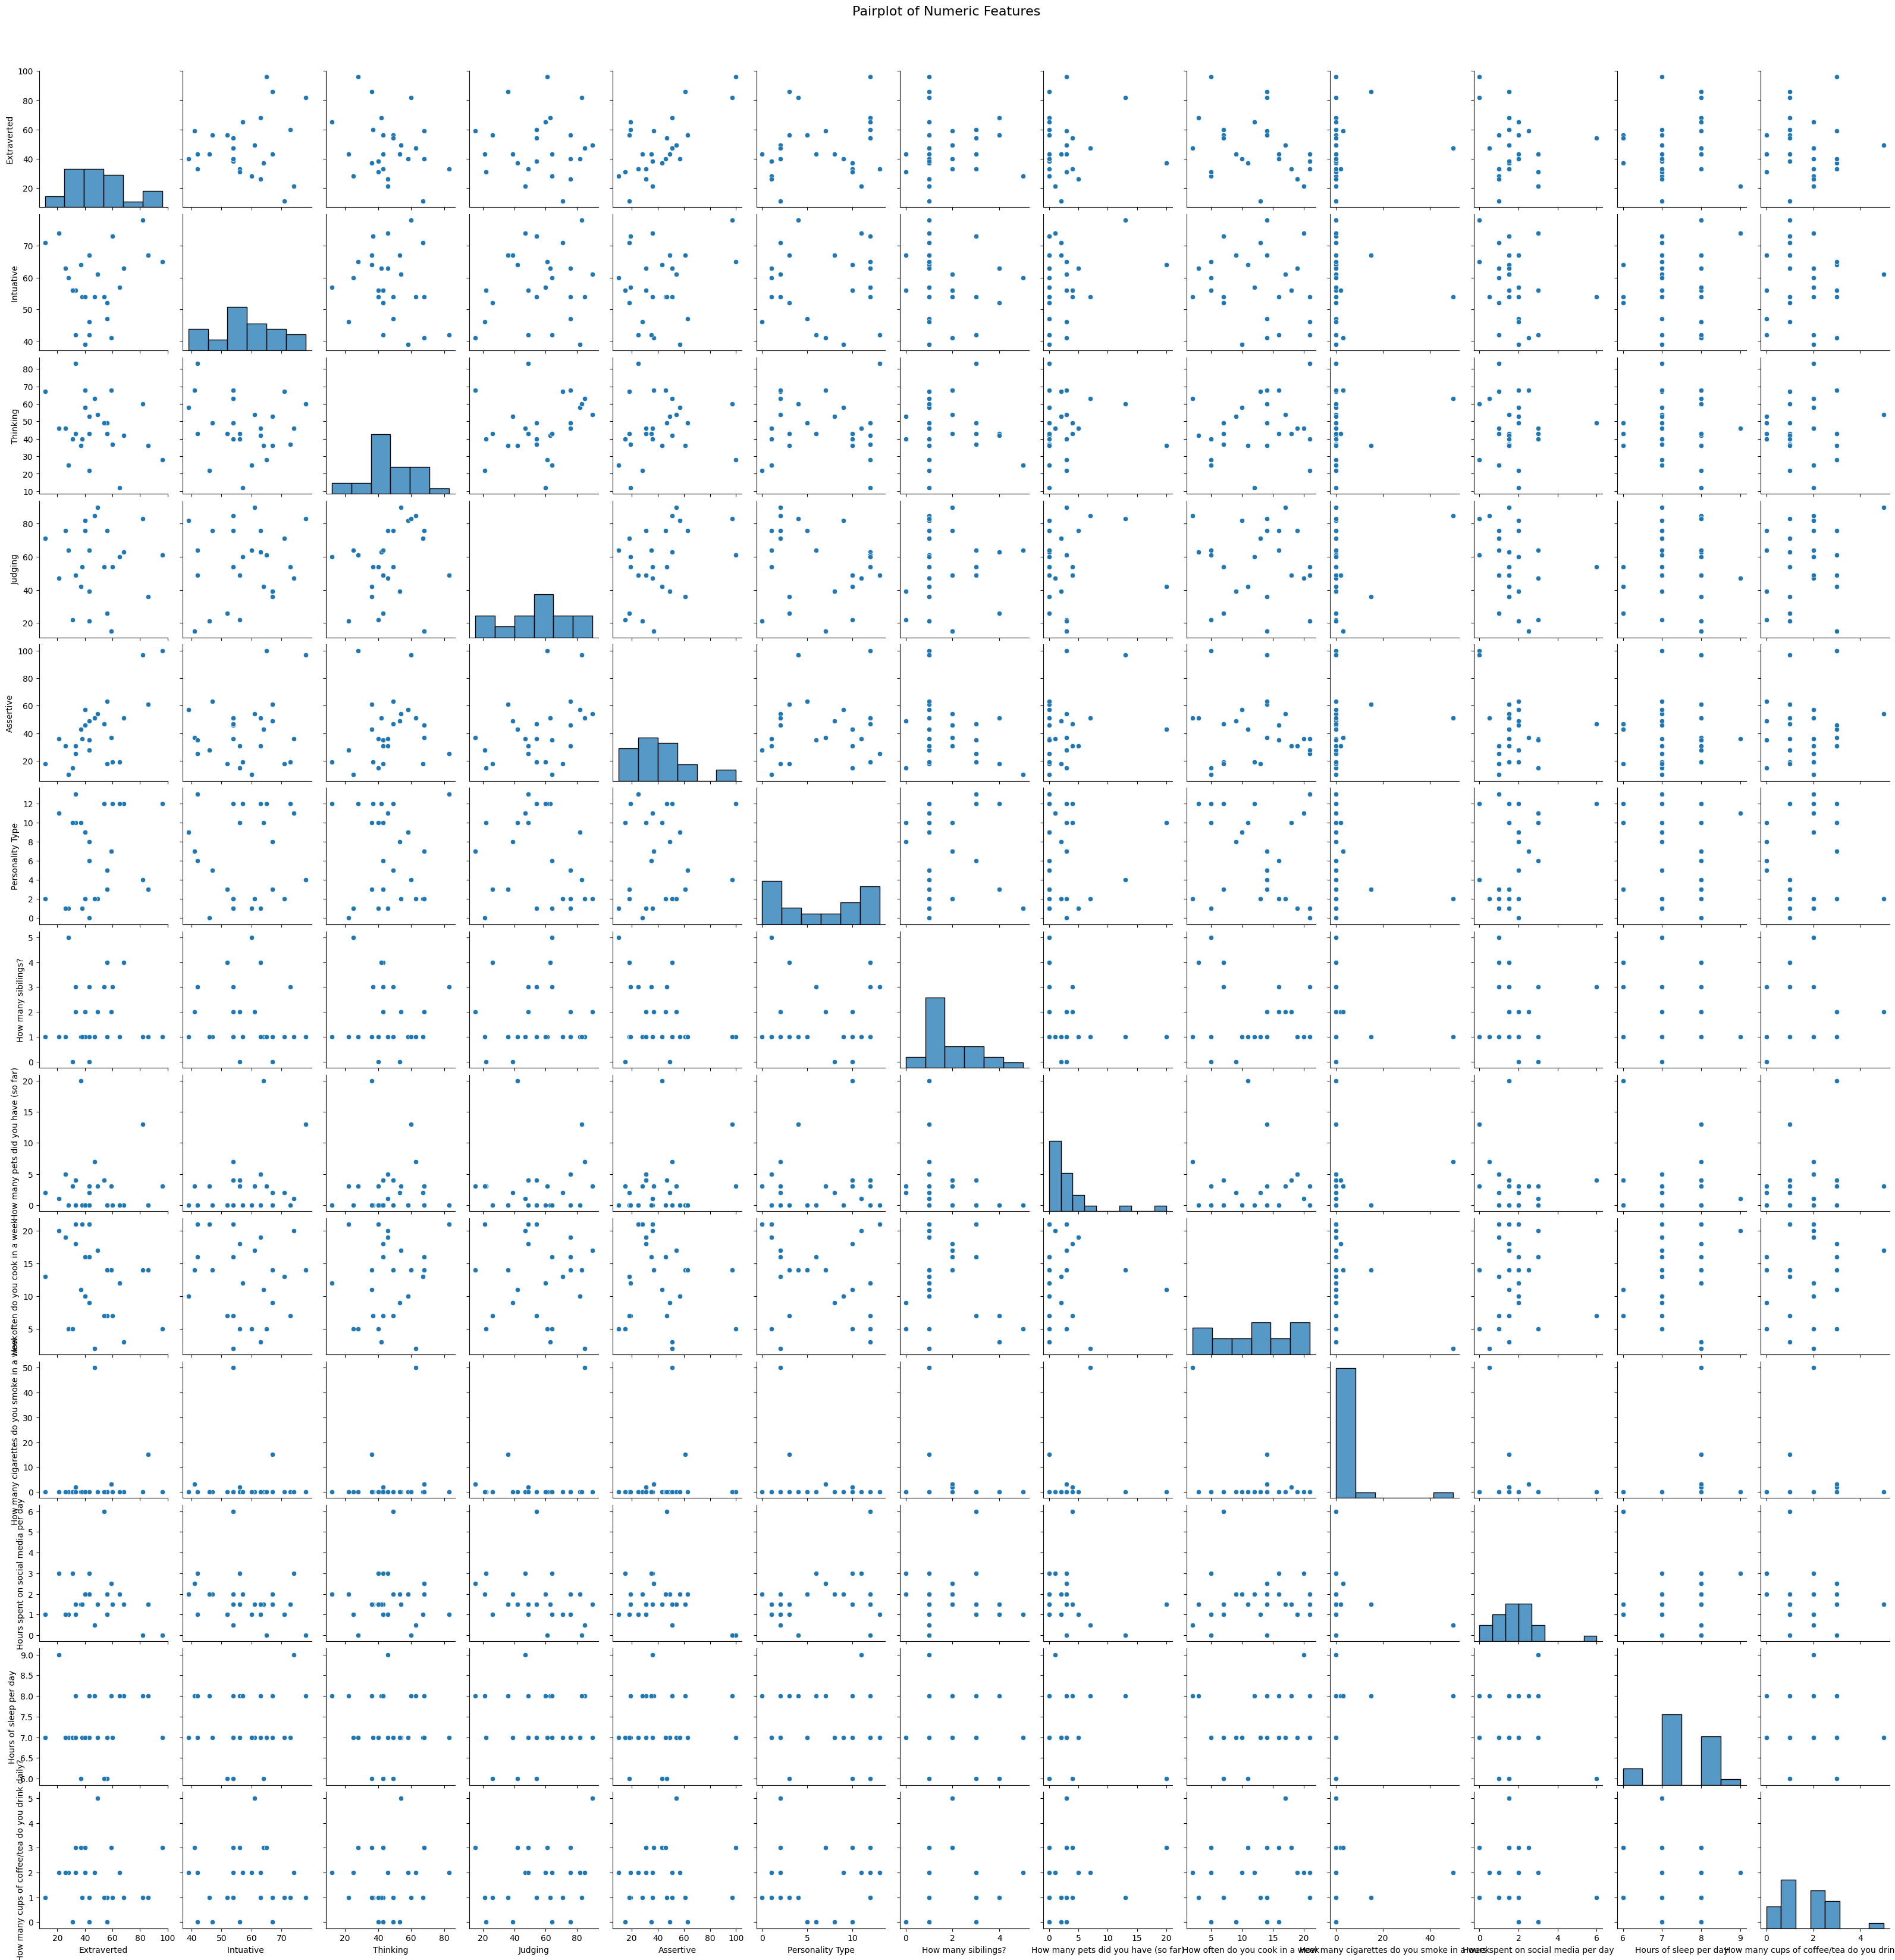

,Extraverted,Intuative,Thinking,Judging,Assertive,Personality Type,How many sibilings?,How many pets did you have (so far),How often do you cook in a week,How many cigarettes do you smoke in a week,Hours spent on social media per day,Hours of sleep per day,How many cups of coffee/tea do you drink daily?
Extraverted,1.000000,0.142705,-0.253459,-0.005054,0.672051,0.194158,0.020707,0.034839,-0.322935,0.104303,-0.192544,0.102209,-0.001719
Intuative,0.142705,1.000000,-0.184044,0.158563,0.209398,0.035775,-0.168739,0.302472,-0.161838,-0.036251,-0.285916,0.103381,0.000716
Thinking,-0.253459,-0.184044,1.000000,0.244324,0.135477,-0.061035,-0.024550,0.033188,0.179124,0.177837,-0.035520,-0.066522,0.121217
Judging,-0.005054,0.158563,0.244324,1.000000,0.382965,-0.201175,0.017427,0.042979,-0.040041,0.189052,-0.281291,-0.002383,0.244260
Assertive,0.672051,0.209398,0.135477,0.382965,1.000000,0.051410,-0.314664,0.308159,-0.096195,0.130069,-0.239204,0.103015,0.137800
Personality Type,0.194158,0.035775,-0.061035,-0.201175,0.051410,1.000000,0.050416,0.011049,-0.257427,-0.239097,0.309611,0.008361,-0.008559
How many sibilings?,0.020707,-0.168739,-0.024550,0.017427,-0.314664,0.050416,1.000000,-0.295796,-0.232346,-0.151794,0.053332,-0.177142,0.076567
How many pets did you have (so far),0.034839,0.302472,0.033188,0.042979,0.308159,0.011049,-0.295796,1.000000,-0.059303,0.147474,-0.172602,-0.171691,0.235317
How often do you cook in a week,-0.322935,-0.161838,0.179124,-0.040041,-0.096195,-0.257427,-0.232346,-0.059303,1.000000,-0.317961,0.027214,0.276982,0.175109
How many cigarettes do you smoke in a week,0.104303,-0.036251,0.177837,0.189052,0.130069,-0.239097,-0.151794,0.147474,-0.317961,1.000000,-0.217087,0.260845,0.047048


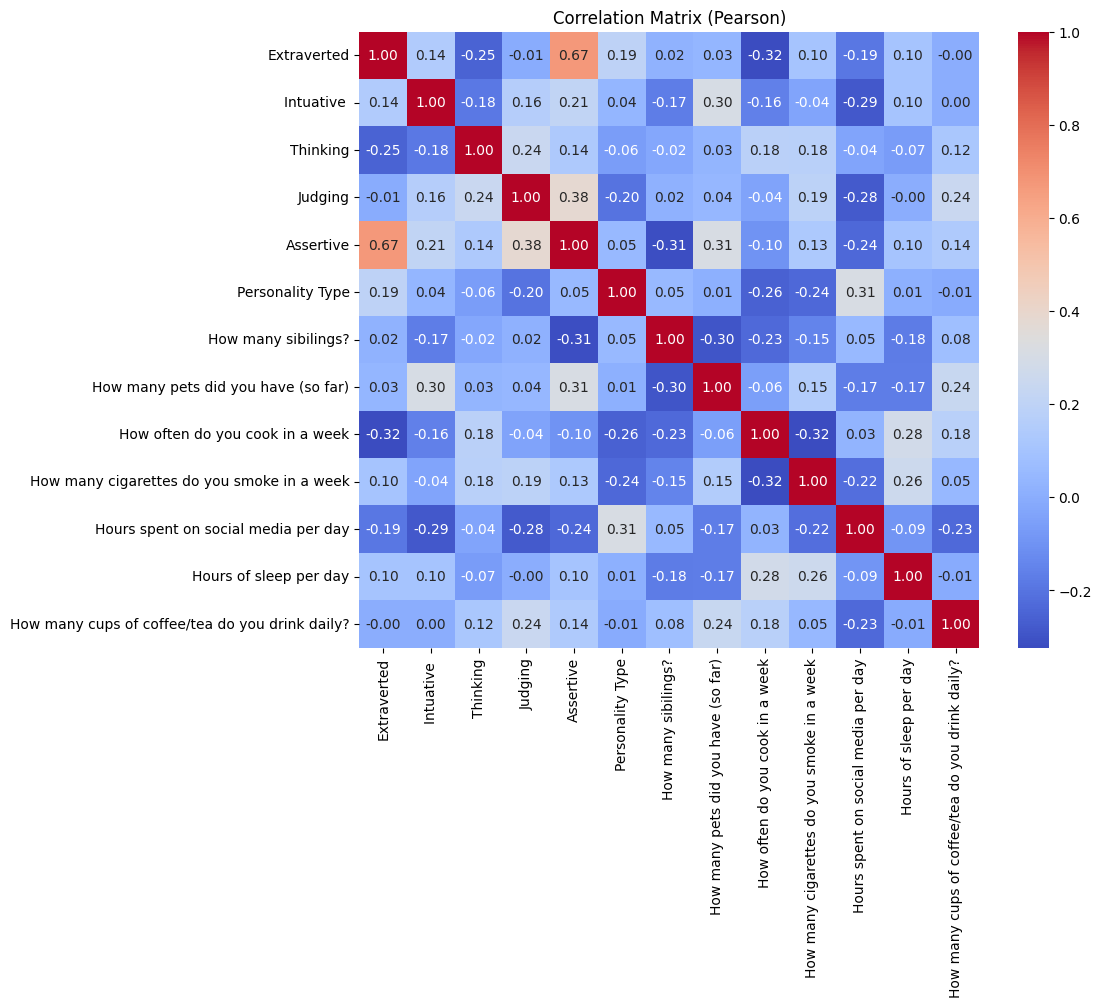

Personality Type Encoding:
Adventurer -> 0
Advocate  -> 1
Architect -> 2
Campaigner -> 3
Commander -> 4
Consul -> 5
Defender -> 6
Entrepreneur -> 7
Logician -> 8
Logistician -> 9
Mediator -> 10
Mediator  -> 11
Protagonist -> 12
Virtuoso -> 13


In [23]:
from sklearn.preprocessing import LabelEncoder

# Drop the "Alias" column
df_cleaned = df.drop(columns=['Alias'])

# Automatically encode "Personality Type" using LabelEncoder
label_encoder = LabelEncoder()
df_cleaned['Personality Type'] = label_encoder.fit_transform(df_cleaned['Personality Type'])

# Ensure all remaining columns are numeric
df_numeric = df_cleaned.apply(pd.to_numeric, errors='coerce')

# Create a pairplot for the numeric DataFrame
sns.pairplot(df_numeric, diag_kind="hist")  # `diag_kind="hist"` uses histograms for diagonal plots
plt.suptitle('Pairplot of Numeric Features', y=1.02, fontsize=16)
plt.show()

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Display the correlation matrix
display(correlation_matrix)

# Optionally, visualize the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Pearson)')
plt.show()

# Display the mapping of Personality Type categories
print("Personality Type Encoding:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category} -> {encoded_value}")

,Extraverted,Intuative,Thinking,Judging,Assertive,Personality Type,How many sibilings?,How many pets did you have (so far),How often do you cook in a week,How many cigarettes do you smoke in a week,Hours spent on social media per day,Hours of sleep per day,How many cups of coffee/tea do you drink daily?
Extraverted,1.000000,0.060216,-0.179294,0.015087,0.544365,0.259825,0.121973,-0.106752,-0.331960,0.193729,-0.096228,0.173999,-0.093193
Intuative,0.060216,1.000000,-0.220354,0.073292,0.096896,0.102295,-0.260056,0.243652,-0.170480,-0.114849,-0.332570,0.085602,-0.017239
Thinking,-0.179294,-0.220354,1.000000,0.346767,0.242461,-0.054809,0.045939,0.130138,0.182881,0.147731,-0.020266,-0.043890,0.128561
Judging,0.015087,0.073292,0.346767,1.000000,0.377549,-0.239617,0.063775,0.016293,-0.076844,-0.163841,-0.350514,-0.022887,0.175292
Assertive,0.544365,0.096896,0.242461,0.377549,1.000000,0.071479,-0.246433,0.190461,-0.060117,0.191211,-0.064770,0.129330,0.115697
Personality Type,0.259825,0.102295,-0.054809,-0.239617,0.071479,1.000000,0.127635,-0.075322,-0.278163,-0.106852,0.226008,-0.002640,0.033556
How many sibilings?,0.121973,-0.260056,0.045939,0.063775,-0.246433,0.127635,1.000000,-0.352833,-0.083443,-0.035052,-0.089119,-0.111358,0.172981
How many pets did you have (so far),-0.106752,0.243652,0.130138,0.016293,0.190461,-0.075322,-0.352833,1.000000,-0.030481,0.237079,-0.165788,0.003960,0.283972
How often do you cook in a week,-0.331960,-0.170480,0.182881,-0.076844,-0.060117,-0.278163,-0.083443,-0.030481,1.000000,-0.046994,0.152533,0.244796,0.150231
How many cigarettes do you smoke in a week,0.193729,-0.114849,0.147731,-0.163841,0.191211,-0.106852,-0.035052,0.237079,-0.046994,1.000000,-0.092755,0.465119,0.246138


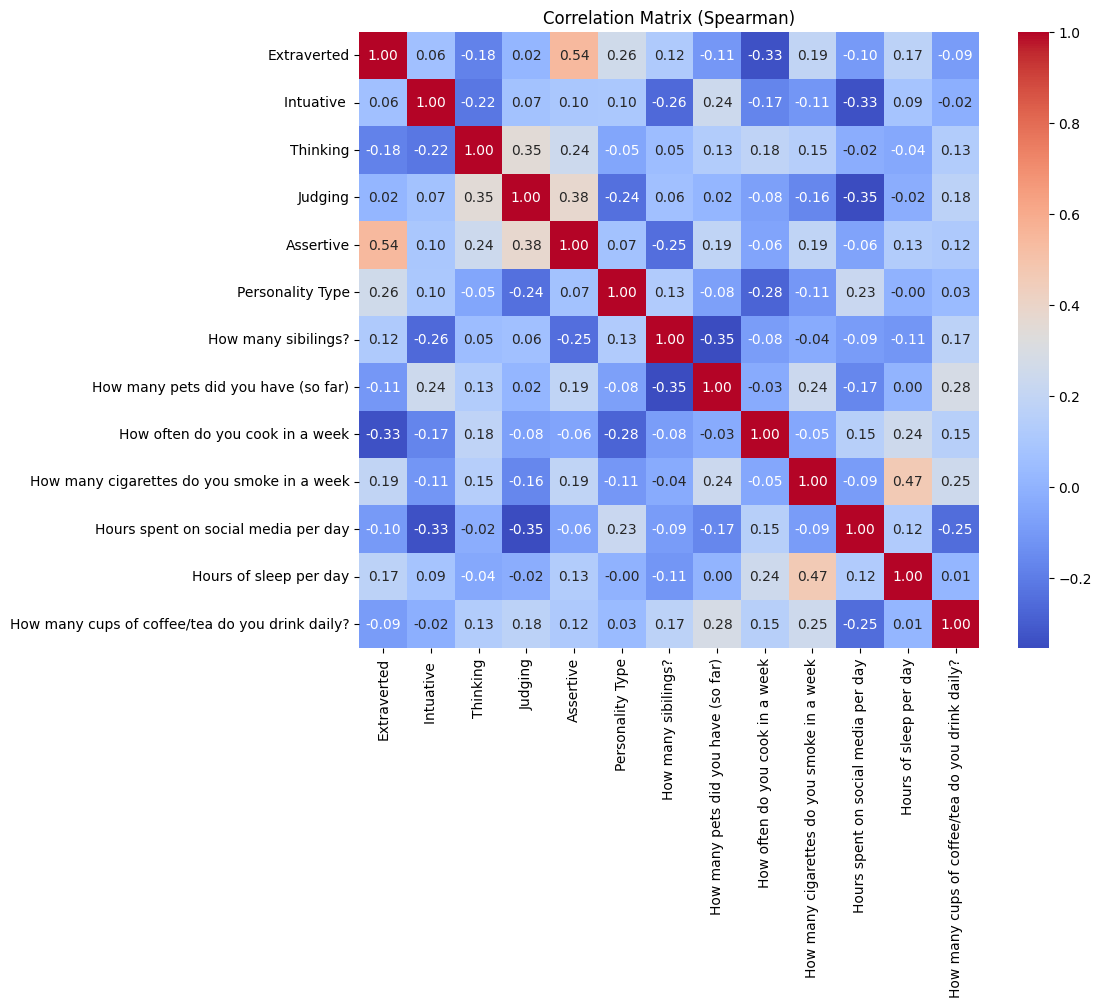

Personality Type Encoding:
Adventurer -> 0
Advocate  -> 1
Architect -> 2
Campaigner -> 3
Commander -> 4
Consul -> 5
Defender -> 6
Entrepreneur -> 7
Logician -> 8
Logistician -> 9
Mediator -> 10
Mediator  -> 11
Protagonist -> 12
Virtuoso -> 13


In [21]:
# Compute the correlation matrix
correlation_matrix = df_numeric.corr(method='spearman')

# Display the correlation matrix
display(correlation_matrix)

# Optionally, visualize the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Spearman)')
plt.show()

# Display the mapping of Personality Type categories
print("Personality Type Encoding:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category} -> {encoded_value}")